In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [49]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
model_path = './datasets/models/face_landmarker.task'#'face_landmarker_v2_with_blendshapes.task'
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

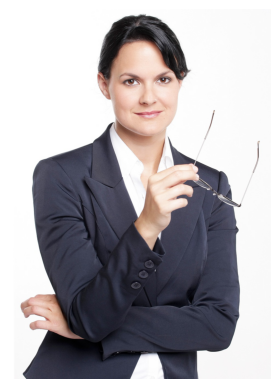

958 1358


In [48]:
img = cv2.imread("./datasets/images/business-person.png")
plt.imshow(cv2.cvtColor(img,4))
plt.axis('off')
plt.show()
height,width,_ = img.shape
print(width,height)

In [50]:
image_path = './datasets/images/business-person.png'
mp_image = mp.Image.create_from_file(image_path)
results = detector.detect(mp_image)
results

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5364461541175842, y=0.2776353657245636, z=-0.022394299507141113, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5379387140274048, y=0.25371024012565613, z=-0.06188288703560829, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536247968673706, y=0.2598191499710083, z=-0.028651179745793343, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5250496864318848, y=0.22575457394123077, z=-0.05379161611199379, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5375166535377502, y=0.24548956751823425, z=-0.06760342419147491, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536074161529541, y=0.23402781784534454, z=-0.06552468240261078, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5319803357124329, y=0.2055772840976715, z=-0.04196988046169281, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.44470280408859253, y=0.20130568742752075, z=-0.002238641260191798, visibility=0.0, presence=0.0), NormalizedL

In [52]:
face_landmarks = results.face_landmarks[0]
face_landmarks[:2]

[NormalizedLandmark(x=0.5364461541175842, y=0.2776353657245636, z=-0.022394299507141113, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.5379387140274048, y=0.25371024012565613, z=-0.06188288703560829, visibility=0.0, presence=0.0)]

In [54]:
[{'x':int(landmark.x*width), 'y':int(landmark.y*height)} for landmark in face_landmarks]

[{'x': 513, 'y': 377},
 {'x': 515, 'y': 344},
 {'x': 513, 'y': 352},
 {'x': 502, 'y': 306},
 {'x': 514, 'y': 333},
 {'x': 513, 'y': 317},
 {'x': 509, 'y': 279},
 {'x': 426, 'y': 273},
 {'x': 507, 'y': 253},
 {'x': 506, 'y': 239},
 {'x': 501, 'y': 177},
 {'x': 513, 'y': 380},
 {'x': 513, 'y': 383},
 {'x': 513, 'y': 385},
 {'x': 513, 'y': 385},
 {'x': 513, 'y': 390},
 {'x': 514, 'y': 395},
 {'x': 514, 'y': 401},
 {'x': 515, 'y': 412},
 {'x': 514, 'y': 349},
 {'x': 503, 'y': 348},
 {'x': 375, 'y': 229},
 {'x': 459, 'y': 282},
 {'x': 448, 'y': 283},
 {'x': 436, 'y': 284},
 {'x': 421, 'y': 277},
 {'x': 469, 'y': 279},
 {'x': 439, 'y': 251},
 {'x': 453, 'y': 252},
 {'x': 426, 'y': 253},
 {'x': 419, 'y': 258},
 {'x': 411, 'y': 285},
 {'x': 473, 'y': 435},
 {'x': 421, 'y': 269},
 {'x': 373, 'y': 279},
 {'x': 396, 'y': 278},
 {'x': 452, 'y': 331},
 {'x': 499, 'y': 375},
 {'x': 499, 'y': 383},
 {'x': 484, 'y': 377},
 {'x': 474, 'y': 379},
 {'x': 487, 'y': 383},
 {'x': 477, 'y': 383},
 {'x': 458,

In [ ]:
face_blendshapes = results.face_blendshapes[0]
face_blendshapes[0]

Category(index=0, score=2.72534475698194e-06, display_name='', category_name='_neutral')

In [63]:
[{'id':face.index,'score':face.score,'name':face.category_name}
 for face in sorted(face_blendshapes, key=lambda x: x.score, reverse=True)[:3]]

[{'id': 44, 'score': 0.6488467454910278, 'name': 'mouthSmileLeft'},
 {'id': 45, 'score': 0.5493622422218323, 'name': 'mouthSmileRight'},
 {'id': 19, 'score': 0.4965294301509857, 'name': 'eyeSquintLeft'}]

In [59]:
[face.category_name for face in face_blendshapes]

['_neutral',
 'browDownLeft',
 'browDownRight',
 'browInnerUp',
 'browOuterUpLeft',
 'browOuterUpRight',
 'cheekPuff',
 'cheekSquintLeft',
 'cheekSquintRight',
 'eyeBlinkLeft',
 'eyeBlinkRight',
 'eyeLookDownLeft',
 'eyeLookDownRight',
 'eyeLookInLeft',
 'eyeLookInRight',
 'eyeLookOutLeft',
 'eyeLookOutRight',
 'eyeLookUpLeft',
 'eyeLookUpRight',
 'eyeSquintLeft',
 'eyeSquintRight',
 'eyeWideLeft',
 'eyeWideRight',
 'jawForward',
 'jawLeft',
 'jawOpen',
 'jawRight',
 'mouthClose',
 'mouthDimpleLeft',
 'mouthDimpleRight',
 'mouthFrownLeft',
 'mouthFrownRight',
 'mouthFunnel',
 'mouthLeft',
 'mouthLowerDownLeft',
 'mouthLowerDownRight',
 'mouthPressLeft',
 'mouthPressRight',
 'mouthPucker',
 'mouthRight',
 'mouthRollLower',
 'mouthRollUpper',
 'mouthShrugLower',
 'mouthShrugUpper',
 'mouthSmileLeft',
 'mouthSmileRight',
 'mouthStretchLeft',
 'mouthStretchRight',
 'mouthUpperUpLeft',
 'mouthUpperUpRight',
 'noseSneerLeft',
 'noseSneerRight']

In [37]:
[(landmark.x, landmark.y, landmark.z) for landmark in face_landmarks]


[(0.5364461541175842, 0.2776353657245636, -0.022394299507141113),
 (0.5379387140274048, 0.25371024012565613, -0.06188288703560829),
 (0.536247968673706, 0.2598191499710083, -0.028651179745793343),
 (0.5250496864318848, 0.22575457394123077, -0.05379161611199379),
 (0.5375166535377502, 0.24548956751823425, -0.06760342419147491),
 (0.536074161529541, 0.23402781784534454, -0.06552468240261078),
 (0.5319803357124329, 0.2055772840976715, -0.04196988046169281),
 (0.44470280408859253, 0.20130568742752075, -0.002238641260191798),
 (0.5296629667282104, 0.18684381246566772, -0.0394672267138958),
 (0.5289290547370911, 0.17644354701042175, -0.04534329101443291),
 (0.5236356854438782, 0.13106109201908112, -0.044701043516397476),
 (0.5364916920661926, 0.28011104464530945, -0.019861718639731407),
 (0.536400556564331, 0.2823982238769531, -0.015518230386078358),
 (0.5360082387924194, 0.28409522771835327, -0.009711619466543198),
 (0.5359824895858765, 0.2841099798679352, -0.009559080936014652),
 (0.536365